In [156]:
import os
import json
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=UserWarning)



In [157]:
experiments_data = pd.DataFrame()
experiments_path = Path("..", "experiments", "planning")
planning_datafiles = os.listdir(experiments_path)
for planning_filename in planning_datafiles:
    env_data = pd.read_json(experiments_path / planning_filename)
    if "requirements_level" in env_data.columns:
        env_data["Requirements level"] = env_data["requirements_level"]
        env_data.drop("requirements_level", axis=1, inplace=True)
    experiments_data = pd.concat((experiments_data, env_data))


experiments_data["Total Time (msec)"] = experiments_data[["Planning Time (msec)", "Heuristic Time (msec)", "Search Time (msec)"]].sum(axis=1)
experiments_data["Total Time (s)"] = experiments_data["Total Time (msec)"] / 1000
experiments_data["Plan Length"] = experiments_data["Plan Length"].astype(float)
experiments_data.reset_index(drop=True, inplace=True)
experiments_data

,env_id,trial,States Evaluated,Planning Time (msec),Heuristic Time (msec),Search Time (msec),Plan Length,Requirements level,Total Time (msec),Total Time (s)
0,LightRecursiveHcraft-K10-I10,0,7219700,55238,26137,54825,518.0,9.0,136200,136.200
1,LightRecursiveHcraft-K10-I10,1,7219700,55529,26231,55118,518.0,9.0,136878,136.878
2,LightRecursiveHcraft-K10-I10,2,7219700,54721,25666,54305,518.0,9.0,134692,134.692
3,LightRecursiveHcraft-K10-I10,3,7219700,55174,26462,54772,518.0,9.0,136408,136.408
4,LightRecursiveHcraft-K10-I10,4,7219700,54493,25690,54069,518.0,9.0,134252,134.252
...,...,...,...,...,...,...,...,...,...,...
1185,TowerHcraft-H8-W1,5,17,846,14,42,9.0,8.0,902,0.902
1186,TowerHcraft-H8-W1,6,17,864,4,16,9.0,8.0,884,0.884
1187,TowerHcraft-H8-W1,7,17,626,4,20,9.0,8.0,650,0.650
1188,TowerHcraft-H8-W1,8,17,635,4,17,9.0,8.0,656,0.656


In [158]:
mean_experiments_data = experiments_data.groupby("env_id").mean()
mean_experiments_data

,trial,States Evaluated,Planning Time (msec),Heuristic Time (msec),Search Time (msec),Plan Length,Requirements level,Total Time (msec),Total Time (s)
env_id,,,,,,,,,
LightRecursiveHcraft-K10-I10,4.5,7219700.0,55389.0,26240.4,54974.9,518.0,9.0,136604.3,136.6043
LightRecursiveHcraft-K2-I1,4.5,1.0,608.3,0.2,10.6,1.0,0.0,619.1,0.6191
LightRecursiveHcraft-K2-I10,4.5,16967.0,768.1,148.0,349.6,149.0,9.0,1265.7,1.2657
LightRecursiveHcraft-K2-I11,4.5,233274.0,2142.8,836.3,1750.7,259.0,10.0,4729.8,4.7298
LightRecursiveHcraft-K2-I2,4.5,3.0,569.0,0.5,11.1,2.0,1.0,580.6,0.5806
...,...,...,...,...,...,...,...,...,...
TowerHcraft-H5-W2,4.5,18247.0,801.3,194.1,393.3,69.0,5.0,1388.7,1.3887
TowerHcraft-H6-W1,4.5,13.0,543.8,2.1,14.3,7.0,6.0,560.2,0.5602
TowerHcraft-H6-W2,4.5,381169.0,5257.2,2578.2,4690.0,153.0,6.0,12525.4,12.5254


In [159]:
def filter_and_preprocess_data_for_plot(data: pd.DataFrame, name:str) -> pd.DataFrame:
    data = data[data["env_id"].str.contains(name)]
    data["env_id"] = data["env_id"].str.replace(name,'').str.replace('-','').str.replace('v1','')
    return data

In [160]:
minihcraft_data = filter_and_preprocess_data_for_plot(experiments_data, name="MiniHCraft")
minihcraft_data

C:\Users\mathi\AppData\Local\Temp\ipykernel_620\867608067.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["env_id"] = data["env_id"].str.replace(name,'').str.replace('-','').str.replace('v1','')


,env_id,trial,States Evaluated,Planning Time (msec),Heuristic Time (msec),Search Time (msec),Plan Length,Requirements level,Total Time (msec),Total Time (s)
770,Crossing,0,4,383,1,8,2.0,3.0,392,0.392
771,Crossing,1,4,372,0,8,2.0,3.0,380,0.380
772,Crossing,2,4,388,0,8,2.0,3.0,396,0.396
773,Crossing,3,4,375,1,7,2.0,3.0,383,0.383
774,Crossing,4,4,375,0,8,2.0,3.0,383,0.383
...,...,...,...,...,...,...,...,...,...,...
845,UnlockPickup,5,19,419,5,16,8.0,7.0,440,0.440
846,UnlockPickup,6,19,422,5,18,8.0,7.0,445,0.445
847,UnlockPickup,7,19,423,5,18,8.0,7.0,446,0.446
848,UnlockPickup,8,19,421,7,18,8.0,7.0,446,0.446


In [161]:
sns.color_palette("tab10")


[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [166]:
from matplotlib.lines import Line2D
import numpy as np
from scipy.optimize import curve_fit

# Define the function to be fitted
def singularity(x, a, b):
    return 1/(a-x) + b


def plot_planning_data(data: pd.DataFrame, env_name:str, hue="env_id", palette=sns.color_palette("tab10")):
    sns.set(style="darkgrid")

    hue_categories = data[hue].unique().tolist()

    def hue_to_color(hue):
        return palette[hue_categories.index(hue) % len(palette)]

    mean_data = data.groupby(hue).mean()
    ci_data = 1.98 * data.groupby(hue).std()

    for x in ("Requirements level", "Plan Length"):
        for y in ("States Evaluated", "Total Time (s)"):
            f, ax = plt.subplots()
            title = f"Planning in {env_name} environments\n{y} by {x}"

            mean_data.sort_values(by=x)
            ci_data.sort_values(by=x)

            for hue_cat in hue_categories:
                mean = mean_data[mean_data.index.str.contains(hue_cat)]
                ci = ci_data[ci_data.index.str.contains(hue_cat)]
                color = hue_to_color(hue_cat)
                plt.errorbar(mean[x], mean[y], xerr=ci[x], yerr=ci[y],
                             color=color, linestyle="", marker="+")
            # plt.xscale('log')
            plt.yscale('log')
            plt.grid(True, which="both")

            handles, labels = ax.get_legend_handles_labels()
            handles = [
                Line2D([], [], color=h.get_facecolor(), linestyle='', marker="+")
                for h, l in zip(handles, labels)
            ]

            ax.legend(handles, labels, title=hue, bbox_to_anchor=(1.01, 1.01), loc="upper left")
            ax.set_title(title)
            x_snake = x.replace(" ", "_").lower()
            y_snake = y.replace(" ", "_").lower()
            f.savefig(f"{env_name}_{y_snake}_by_{x_snake}", bbox_inches="tight")
            plt.show()

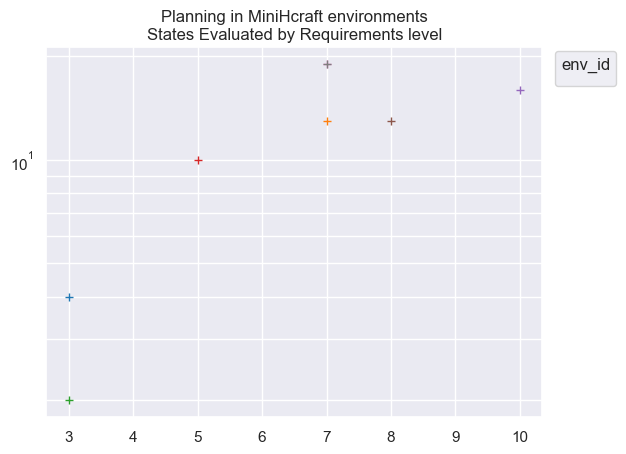

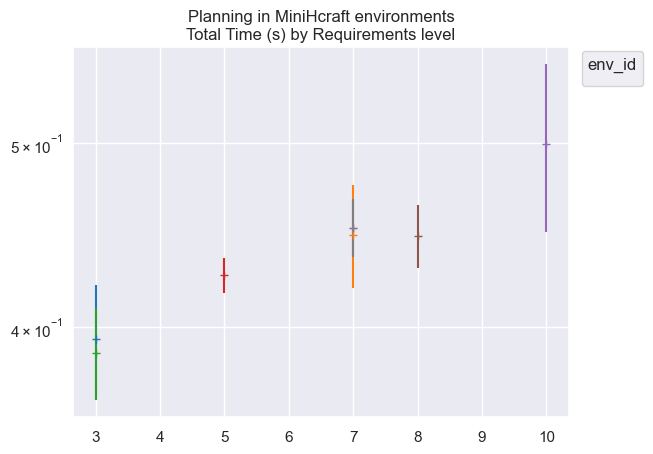

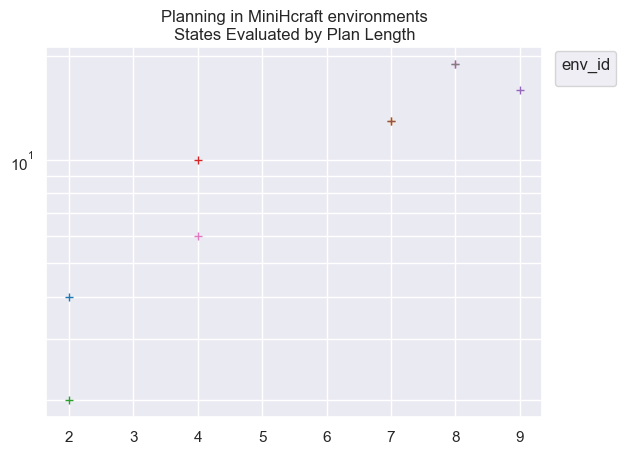

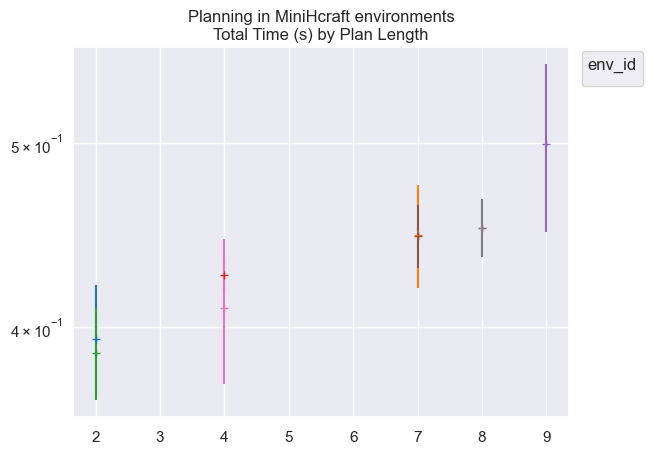

In [163]:
plot_planning_data(minihcraft_data, env_name="MiniHcraft")

In [167]:
minehcraft_data = filter_and_preprocess_data_for_plot(experiments_data, name="MineHcraft")
minehcraft_data

C:\Users\mathi\AppData\Local\Temp\ipykernel_620\867608067.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["env_id"] = data["env_id"].str.replace(name,'').str.replace('-','').str.replace('v1','')


,env_id,trial,States Evaluated,Planning Time (msec),Heuristic Time (msec),Search Time (msec),Plan Length,Requirements level,Total Time (msec),Total Time (s)
530,Coal,0,188,1869,169,292,16.0,10.0,2330,2.330
531,Coal,1,188,1586,114,179,16.0,10.0,1879,1.879
532,Coal,2,188,1775,166,251,16.0,10.0,2192,2.192
533,Coal,3,188,1774,187,280,16.0,10.0,2241,2.241
534,Coal,4,188,1898,184,317,16.0,10.0,2399,2.399
...,...,...,...,...,...,...,...,...,...,...
765,WoodSword,5,108,1472,55,103,9.0,6.0,1630,1.630
766,WoodSword,6,108,1443,43,96,9.0,6.0,1582,1.582
767,WoodSword,7,108,1422,42,91,9.0,6.0,1555,1.555
768,WoodSword,8,108,1563,52,109,9.0,6.0,1724,1.724


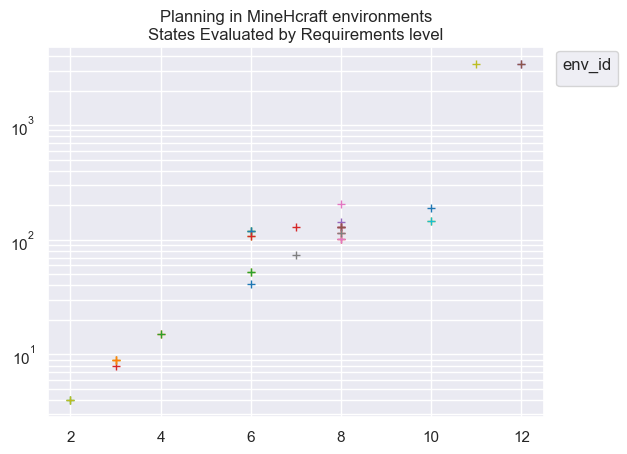

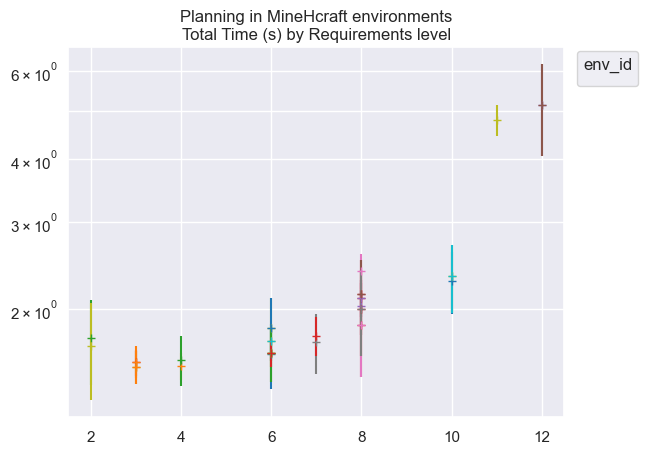

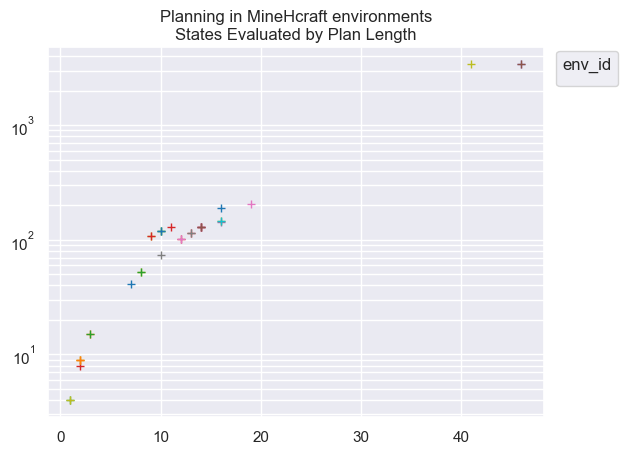

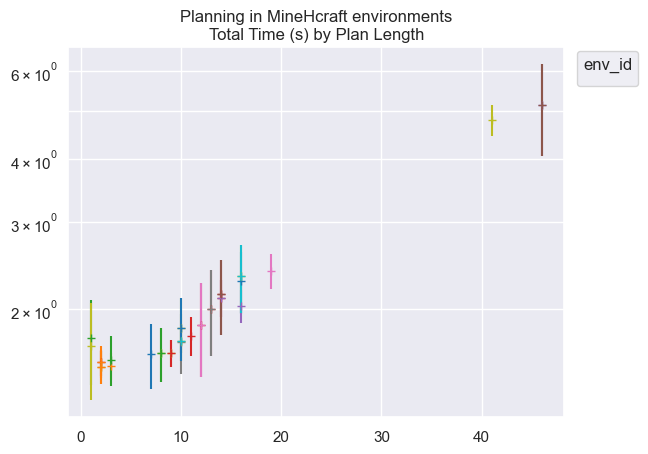

In [168]:
plot_planning_data(minehcraft_data, env_name="MineHcraft")

In [169]:
tower_data = filter_and_preprocess_data_for_plot(experiments_data, name="TowerHcraft")
tower_data["Height"] = tower_data["env_id"].str.extract('H([0-9]+)', expand=False).str.strip().astype(int)
tower_data["Width"] = tower_data["env_id"].str.extract('W([0-9]+)', expand=False).str.strip().astype(int)

cols = list(tower_data.columns)
cols = cols[-2:] + cols[:-2]
tower_data = tower_data[cols]
tower_data

C:\Users\mathi\AppData\Local\Temp\ipykernel_620\867608067.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["env_id"] = data["env_id"].str.replace(name,'').str.replace('-','').str.replace('v1','')
C:\Users\mathi\AppData\Local\Temp\ipykernel_620\2917596318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tower_data["Height"] = tower_data["env_id"].str.extract('H([0-9]+)', expand=False).str.strip().astype(int)
C:\Users\mathi\AppData\Local\Temp\ipykernel_620\2917596318.py:3: SettingWithCopyWarning: 


,Height,Width,env_id,trial,States Evaluated,Planning Time (msec),Heuristic Time (msec),Search Time (msec),Plan Length,Requirements level,Total Time (msec),Total Time (s)
950,1,1,H1W1,0,3,362,0,8,2.0,1.0,370,0.370
951,1,1,H1W1,1,3,354,0,8,2.0,1.0,362,0.362
952,1,1,H1W1,2,3,355,1,8,2.0,1.0,364,0.364
953,1,1,H1W1,3,3,371,1,8,2.0,1.0,380,0.380
954,1,1,H1W1,4,3,359,0,8,2.0,1.0,367,0.367
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,8,1,H8W1,5,17,846,14,42,9.0,8.0,902,0.902
1186,8,1,H8W1,6,17,864,4,16,9.0,8.0,884,0.884
1187,8,1,H8W1,7,17,626,4,20,9.0,8.0,650,0.650
1188,8,1,H8W1,8,17,635,4,17,9.0,8.0,656,0.656


C:\Users\mathi\AppData\Local\Temp\ipykernel_620\1003865730.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_data = data.groupby(hue).mean()
C:\Users\mathi\AppData\Local\Temp\ipykernel_620\1003865730.py:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ci_data = 1.98 * data.groupby(hue).std()


AttributeError: Can only use .str accessor with string values!

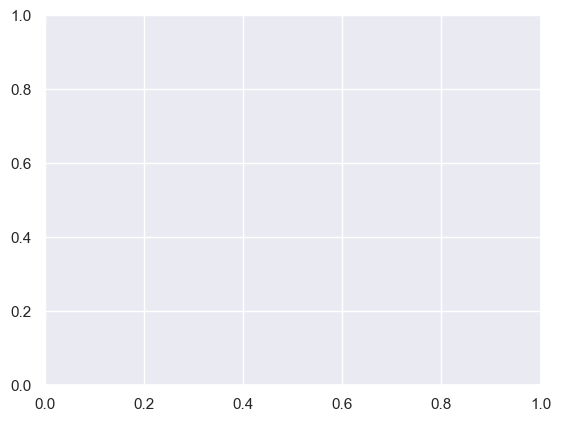

In [171]:
plot_planning_data(tower_data, env_name="TowerHcraft", hue="Width", palette="flare")

In [ ]:
rec_data = filter_and_preprocess_data_for_plot(experiments_data, name="LightRecursiveHcraft")
rec_data["Items"] = rec_data["env_id"].str.extract('I([0-9]+)', expand=False).str.strip().astype(int)
rec_data["Required items"] = rec_data["env_id"].str.extract('K([0-9]+)', expand=False).str.strip().astype(int)

cols = list(rec_data.columns)
cols = cols[-2:] + cols[:-2]
rec_data = rec_data[cols]
rec_data = rec_data.sort_values(by=["Required items", "Items"])
rec_data

C:\Users\mathi\AppData\Local\Temp\ipykernel_620\867608067.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["env_id"] = data["env_id"].str.replace(name,'').str.replace('-','').str.replace('v1','')
C:\Users\mathi\AppData\Local\Temp\ipykernel_620\1789874813.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rec_data["Items"] = rec_data["env_id"].str.extract('I([0-9]+)', expand=False).str.strip().astype(int)
C:\Users\mathi\AppData\Local\Temp\ipykernel_620\1789874813.py:3: SettingWithCopyWarning: 
A val

,Items,Required items,env_id,trial,States Evaluated,Planning Time (msec),Heuristic Time (msec),Search Time (msec),Plan Length,Requirements level,Total Time (msec),Total Time (s)
10,1,2,K2I1,0,1,691,0,10,1.0,0.0,701,0.701
11,1,2,K2I1,1,1,708,0,11,1.0,0.0,719,0.719
12,1,2,K2I1,2,1,584,1,14,1.0,0.0,599,0.599
13,1,2,K2I1,3,1,670,0,10,1.0,0.0,680,0.680
14,1,2,K2I1,4,1,542,1,10,1.0,0.0,553,0.553
...,...,...,...,...,...,...,...,...,...,...,...,...
5,10,10,K10I10,5,7219700,55138,26083,54721,518.0,9.0,135942,135.942
6,10,10,K10I10,6,7219700,55883,26481,55485,518.0,9.0,137849,137.849
7,10,10,K10I10,7,7219700,56135,26451,55711,518.0,9.0,138297,138.297
8,10,10,K10I10,8,7219700,56304,27084,55881,518.0,9.0,139269,139.269


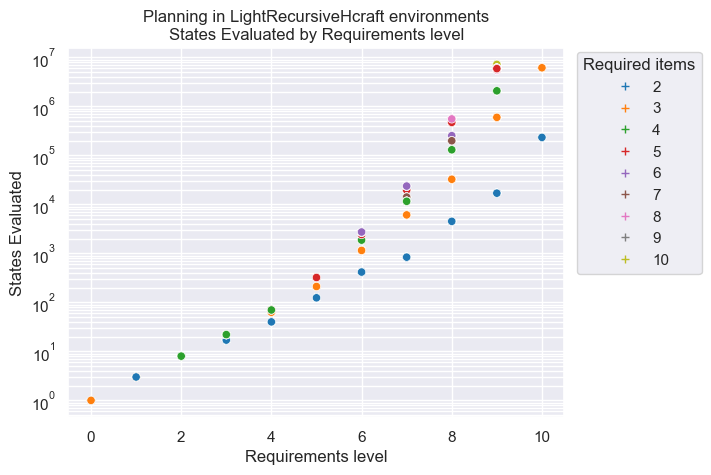

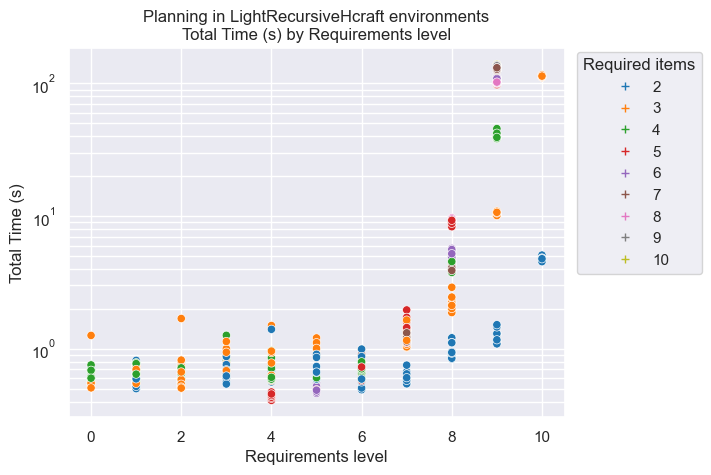

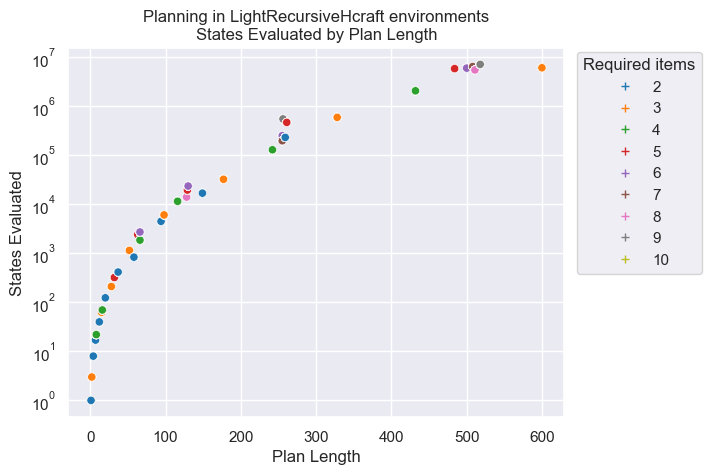

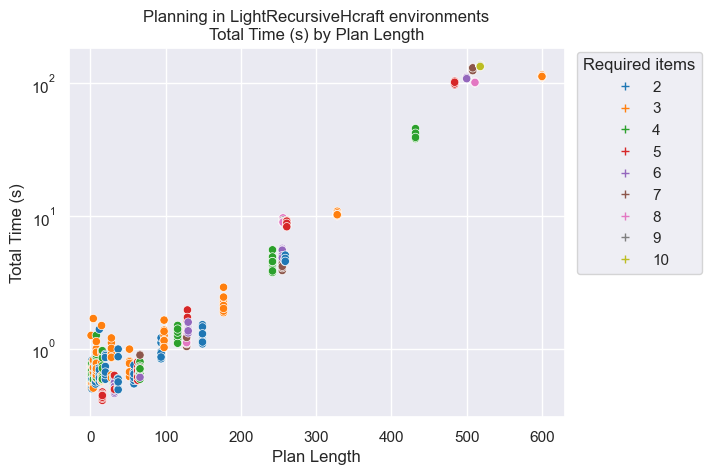

In [ ]:
plot_planning_data(rec_data, env_name="LightRecursiveHcraft", hue="Required items")